# Classical Statistical Inference: Basic concepts

## Table of Content

- II. What is statistical inference ? 
    * II.1 [Point estimate](#II.1-Point-estimate:)
        - II.1.1 [Central limit theorem](#II.1.1-Central-limit-theorem)
        - II.1.2 [Summary of useful statistics](#II.1.2-Summary-of-useful-statistics)
        - II.1.3 [Distributions of estimators](#II.1.3-Distributions-of-estimators)
    * II.2 Confidence interval: See [Frequentist_inference_02.ipynb](Frequentist_inference_02.ipynb)
    * II.3 Hypothesis testing: See [Frequentist_inference_H_test.ipynb](Frequentist_inference_H_test.ipynb) 

    * II.4 Bootstrap and Jacknife: See [Frequentist_inference_H_test.ipynb](Frequentist_inference_H_test.ipynb) 
    
    * II.5 Wrap up: Various approaches of hypothesis testing: See [Frequentist_inference_H_test.ipynb](Frequentist_inference_H_test.ipynb)
    
- X. [References and supplementary material](#X)

## II. What is statistical inference ?  <a class="anchor" id="II"></a>

Statistical inference is the process that consists in deriving information about a phenomenon/something based on a data set. More specifically, it the process of using data to infer the distribution that "generated" the data (also called parent distribution).  This is what is called "learning" in the context of computer science. 

Statistical inference implies first to define a **statistical model** (or several) that describe(s) the data. This can be distribution function(s) but also a regression law(s), that is (are) parametrized by a finite number of parameters, generally denoted $\theta$ in most of statistical books. Then, the remaining of the "game" is to confront this model to the data to see if it is well suited, and whether we can infer the values of its parameters.  

There is basically three types of inference one draws from data:
- **Point estimation**: What is the best estimate for a model parameter $\theta$ based on the available data ? 
- **Confidence estimation**: How confident should we be about our point estimate ? 
- **Hypothesis testing**: Are the data at hand consistent with a given hypothesis or model ? 

This is common to any statistical paradigm (i.e. Frequentist and Bayesian). We will see first how statistical inference is performed under the "classical" (aka frequentist) paradigm. In a future lecture, we will see the Bayesian approach and try to understand the "philosphical" differences between those. 

### II. 1 Point estimate:

Point estimates are estimates of *population parameters based on sample data*. For example, we may want to estimate the mean color of elliptical galaxies at a given redshift based on a subsample drawn from a survey. We would derive a mean value that may differ from the true population mean for several reasons: statistical fluctuation due to the limited size of the sample, bias in selection, ...  

For frequentists, thist consists in deriving a single **best** guess for a quantity of interest, that can be a parameter in a parametric model, a regression function, a CDF $H(x)$, a pdf $h(x)$ or predictions for a future value $Y$ of a random variable. 

By convention, the point estimate of a parameter $\theta$ is denoted $\hat{\theta}$. Remember that here, there is one *single fixed value* of $\theta$, while the estimator $\hat{\theta}$ depends on the data, and is therefore a random variable.   

A point estimator $\hat{\theta}$ of a parameter $\theta$ is a function of the random variables $X_1$, $X_2$, ... such that:    
$$
\hat{\theta} = g(X_1, X_2, X_3, ... X_n)
$$

As for any estimator you have encountered in descriptive statistics, this estimator can be biased (i.e. its value could differ from its true value by some amount), and be characterized by some variance (remember that $\hat{\theta}$ is a random variable). On a statistical point of view, it is important for a point estimator $\hat{\theta}$ to be  **consistent** which means that it **asymptotically converges** to the true parameter value (with asymptotically null variance). 

The distribution of $\hat{\theta}$ is called the **sampling distribution**.  

### II.1.1 Central limit theorem

An important theorem to keep in mind when studying point estimates is the **central limit theorem** which states that: when independent random variables are added, their sum tends toward a normal distribution even if the original variables themselves are not normally distributed. For that reason, if you want to measure the arithmetic mean $\mu$ of a population, you can be sure that the *sampling distribution* of $\hat{\mu}$ will tend towards a normal distribution.    


**Exercise:** 

Verify empirically the central limit theorem using a uniform distribution: 

- (1) Draw a sample of $n = 1.e8$ points from a uniform distribution centered on 0 and of width W=2. This is your virutal population. 
- (2) Calculate the mean based on a sample of M points (selected among your n points): e.g. $M=2, 3, 10$. Repeat this operation $k$ times. Plot the 3 histograms of the mean values for $M=2, 3, 10$. 
- (3) Overplot a normal distribution N(0, $\sigma/\sqrt{N}$)

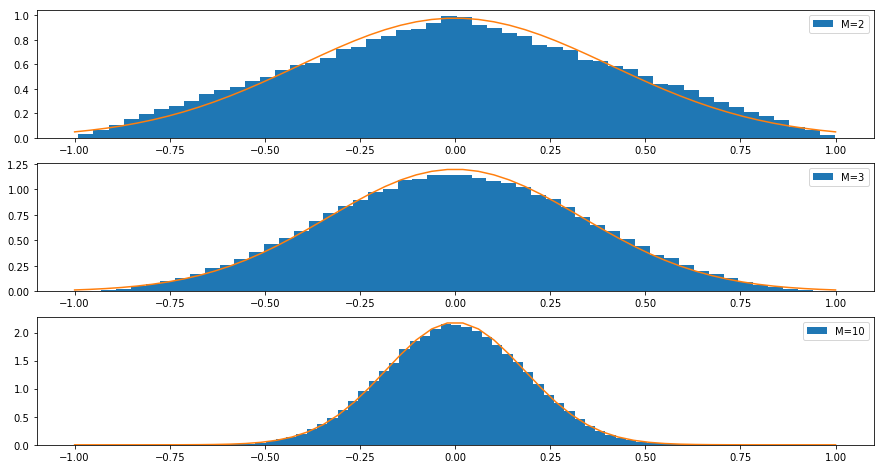

In [3]:
import scipy.stats
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Degine uniform distribution 
W = 2   # = scale = width of the uniform distrib
u = scipy.stats.uniform(-1,  W)  # Warning ! Uniform is constant between loc and loc+scale !

# Set the number of points of the sample and the number of means to evaluate. 
nmax, nsub = 10000000, 100000   # total number of points I draw, and number of times I calculate a mean

# Create an empty array where the mean of each sample will be saved 
muval = np.zeros(nsub)

# Generate the population of nmax data points  
s = u.rvs(nmax)

# create a figure with 3 rows (3 panels)  
f, ax = plt.subplots(nrows=3, figsize=(15,8))
nbins = 50
x = np.linspace(-1, 1, nbins)

# Loop over the 3 values of M and calculate the mean of k subsamples for each value of M. 
# make the plot associated to each value of M within the loop 
for i, M in enumerate([2, 3, 10]):
    for k in range(nsub):
        muval[k] = np.random.choice(s, M).mean()
    h1 = ax[i].hist(muval, bins=nbins, normed=True, label='M=%i'%M)
    n=scipy.stats.norm(loc=0, scale= (W/np.sqrt(12)) /np.sqrt(float(M)))
    ax[i].plot(x, n.pdf(x))
    ax[i].legend(loc='best')

### II.1.2 Summary of useful statistics

|    Name   | Sample Statistics | Population Statistics | 
|-------|-------------------|-----------------------| 
|size   |             n     |        N              | 
| mean  | $\hat{\mu} = \bar{x} = \frac{\sum_i x_i}{n}$ | $\mu = \bar{X} = \frac{\sum_i X_i}{N}$ |  
| Variance | $s^2 = \frac{\sum_i(x_i-\bar{x})^2}{n-1}$ | $\sigma^2 = \frac{\sum_i(X_i-\bar{X})^2}{N}$ |
| Standard deviation | $\hat{\sigma} = s = \sqrt{s^2}$  | $\sigma = \sqrt{\sigma^2}$ |
| Proportions | $\hat{p} = \frac{n {\rm{~of~success}} } {n {\rm{~of~trials}}}$ | $p = \frac{N {\rm{~of~success}} }{N {\rm{~of~trials}}} $|


In addition: 
* **Standard error on the mean**: standard deviation of the distribution of sample means: $stde(\bar{x}) = \frac{s} { \sqrt{n}}$

* **"Standard" error on the standard deviation** : $ stde(s) = s / \sqrt{2(n-1)}$  

* **Standard error on the sample proportion** (remember standard deviation of Bernouilli): standard deviation of the distribution of sample proportions: $stde(\hat{p}) = \frac{ \sqrt{p\,(1-p)} }  {\sqrt{n}} $


### II.1.3 Distributions of estimators

Given a random variable $\{X_i\}$ whose population is $N(\mu, \sigma)$, the pdf of the following variable/estimators are: 

* Sample distribution of $\hat{\mu} $, when $\sigma$ is known, is a normal distribution 
$$
\hat{\mu} ~ \sim ~ N(\mu, \sigma/\sqrt{n})
$$ 
Equivalently, we can make a change of variable, and consider 
the random variable: 
$$
Z = \frac{\bar{X}-\hat{\mu}} { (\sigma/\sqrt{n}) } ~ \sim ~ N(0,1) 
$$ 
 
* Sample distribution of t 
$$
t= \frac{ \bar{X}-\hat{\mu} } {(s/\sqrt{n}) } ~ \sim ~ t(n-1)
$$ 
is a student distribution. It is not a normal distribution, because $\sigma$ is unknown (that's why we use s in the expression above).    
* The sample distribution of 
$$
S = \frac{ (n-1) s^2 } {\sigma^2 } ~ \sim ~ \chi^2(n-1). 
$$ 
is a $\chi^2$ distribution.$s^2$ is the sample variance; S is sometimes called "normalised variance".

## Summary

- Quantities we have access/are evalutating through measurements are *estimator* of the population statistics. Since they are based on samples drawn from the population, we speak of sample statistics. We write $\hat{\theta}$ the estimator of $\theta$. An estimator is a funtion of random variables, and is therefore a random variable with a specific distribution (i.e. PDF). 
- The central limit theorem states that when independant random variables are *added*, their sum tends towards a normal distribution, even if they individually do not follow a normal distribution.  
- We have reviewed how the main (sample) statistics are calculated 
- The distribution of the sample mean $\hat{\mu}$ (of a sample of random variables) is a normal (gaussian) distribution if the standard standard deviation of the population is known. In general, the standard deviation is *not* known, and the estimator of the mean follows a Student distribution (see [Descriptive_statistics_02.ipynb](../03-Basic_statistics_and_proba_concepts/Descriptive_statistics_02.ipynb) to get the expression of the student's distribution). When the sample is large, the student's and gaussian distributions are almost undistinguishable. 
- The sample variance follows a $\chi^2$ distribution (see [Descriptive_statistics_02.ipynb](../03-Basic_statistics_and_proba_concepts/Descriptive_statistics_02.ipynb) to get the expression of the $\chi^2$ distribution). When the sample is large, the $\chi^2$ distribution becomes very similar to a gaussian distribution. 

## X. References and supplementary material: <a class="anchor" id="X"></a>

**Chapter 4** (4.1 4.2, 4.5, 4.7) of the book <a class="anchor" id="book"></a> *Statistics, data mining and Machine learning in astronomy* by Z. Ivezic et al. in Princeton Series in Modern Astronomy. 

*All of statistics: a concise course in statistical inference*, Wasserman 2004  <a class="anchor" id="WAS04"></a>(see also errata in http://www.stat.cmu.edu/~larry/all-of-statistics/): **Chapter 8, 9**

* *Statistics in theory and Practice*, Lupton 1993 <a class="anchor" id="LUP93"></a>: **Chapter 6, 7, 8, 9**

* [Numerical recipes](http://www2.units.it/ipl/students_area/imm2/files/Numerical_Recipes.pdf) by Press et al. Cambridge University press: **Chapter 14**

* *Penn State Lectures on statistics*: https://onlinecourses.science.psu.edu/stat414/  ** STAT 415 Sect 6-7-8**

* *Penn State Lectures on statistics*: https://onlinecourses.science.psu.edu/stat200 **STAT 200 Sect. 8, 8, 9**

* *Scipy course on statistics* http://www.scipy-lectures.org/packages/statistics/index.html#id9
